In [1]:
import time
import json
import requests
import pandas as pd
from tqdm import tqdm

In [3]:
gene_info = pd.read_csv('Mammalia/Homo_sapiens.gene_info.tsv', sep='\t')
gene_info = gene_info[gene_info['type_of_gene'] == 'protein-coding']
gene_info

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410...,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20240503,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899...,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20240505,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171...,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20240403,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156...,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20240502,-
6,9606,12,SERPINA3,-,AACT|ACT|GIG24|GIG25,MIM:107280|HGNC:HGNC:16|Ensembl:ENSG0000019613...,14,14q32.13,serpin family A member 3,protein-coding,SERPINA3,serpin family A member 3,O,alpha-1-antichymotrypsin|cell growth-inhibitin...,20240317,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193444,741158,8923209,ND1,-,-,-,MT,-,NADH dehydrogenase subunit 1,protein-coding,-,-,-,NADH dehydrogenase subunit 1,20230818,-
193445,741158,8923210,ND5,-,-,-,MT,-,NADH dehydrogenase subunit 5,protein-coding,-,-,-,NADH dehydrogenase subunit 5,20230818,-
193446,741158,8923211,ATP8,-,-,-,MT,-,ATP synthase F0 subunit 8,protein-coding,-,-,-,ATP synthase F0 subunit 8,20230818,-
193447,741158,8923212,ND2,-,-,-,MT,-,NADH dehydrogenase subunit 2,protein-coding,-,-,-,NADH dehydrogenase subunit 2,20240403,-


In [4]:
gene_convert = {}
for i, row in gene_info.iterrows():
    if len(row['dbXrefs'].split('|')) > 2:
        gene_convert[row['Symbol']] = row['dbXrefs'].split('|')[2].split(':')[1]

In [5]:
def query_known_drugs(ensembl_id: str, free_text: str = None):
  # Set gene_id variable for AR (androgen receptor)

  # Build query string to get general information about AR and genetic constraint and tractability assessments 
  query_string = """
  query KnownDrugsQuery(
    $ensgId: String!
    $cursor: String
    $freeTextQuery: String
    $size: Int = 20
  ) {
    target(ensemblId: $ensgId) {
      id
      knownDrugs(cursor: $cursor, freeTextQuery: $freeTextQuery, size: $size) {
        count
        cursor
        rows {
          phase
          status
          urls {
            name
            url
          }
          disease {
            id
            name
          }
          drug {
            id
            name
            mechanismsOfAction {
              rows {
                actionType
                targets {
                  id
                }
              }
            }
          }
          drugType
          mechanismOfAction
        }
      }
    }
  }
  """

  # Set variables object of arguments to be passed to endpoint
  if free_text:
    variables = {"ensgId": ensembl_id, "freeTextQuery": free_text}
  else:
    variables = {"ensgId": ensembl_id}

  # Set base URL of GraphQL API endpoint
  base_url = "https://api.platform.opentargets.org/api/v4/graphql"
  # Perform POST request and check status code of response
  r = requests.post(base_url, json={"query": query_string, "variables": variables})
  if r.status_code != 200:
    print(f"Error: {r.status_code}")
    time.sleep(1)
    return query_known_drugs(ensembl_id, free_text)
  # Transform API response from JSON into Python dictionary and print in console
  api_response = json.loads(r.text)
  if not api_response['data']['target']:
    return []
  return api_response['data']['target']['knownDrugs']['rows']

In [6]:
flat_list = [('PMEL', ('cluster1-keratin-high', 'ARCHS4')),
 ('DCT', ('cluster1-keratin-high', 'ARCHS4')),
 ('MLANA', ('cluster1-keratin-high', 'ARCHS4')),
 ('TRPM1', ('cluster1-keratin-high', 'ARCHS4')),
 ('CDH19', ('cluster1-keratin-high', 'ARCHS4')),
 ('DSG1', ('cluster1-keratin-high', 'ARCHS4')),
 ('EDNRB', ('cluster1-keratin-high', 'ARCHS4')),
 ('GPR143', ('cluster1-keratin-high', 'ARCHS4')),
 ('IL12RB2', ('cluster1-keratin-high', 'ARCHS4')),
 ('PLP1', ('cluster1-keratin-high', 'ARCHS4')),
 ('MLANA', ('cluster1-keratin-high', 'GTEx')),
 ('GJD3', ('cluster1-keratin-high', 'GTEx')),
 ('TAS2R13', ('cluster1-keratin-high', 'GTEx')),
 ('PMEL', ('cluster1-keratin-high', 'GTEx')),
 ('TRPM1', ('cluster1-keratin-high', 'GTEx')),
 ('RELL1', ('cluster1-keratin-high', 'GTEx')),
 ('SLC31A2', ('cluster1-keratin-high', 'GTEx')),
 ('GPR52', ('cluster1-keratin-high', 'GTEx')),
 ('IL12RB2', ('cluster1-keratin-high', 'GTEx')),
 ('DCT', ('cluster1-keratin-high', 'GTEx')),
 ('PMEL', ('cluster1-keratin-high', 'TS')),
 ('MLANA', ('cluster1-keratin-high', 'TS')),
 ('DCT', ('cluster1-keratin-high', 'TS')),
 ('TRPM1', ('cluster1-keratin-high', 'TS')),
 ('PLP1', ('cluster1-keratin-high', 'TS')),
 ('SLC6A15', ('cluster1-keratin-high', 'TS')),
 ('SGCD', ('cluster1-keratin-high', 'TS')),
 ('CSPG4', ('cluster1-keratin-high', 'TS')),
 ('CELSR2', ('cluster1-keratin-high', 'TS')),
 ('DSG1', ('cluster1-keratin-high', 'TS')),
 ('PMEL', ('cluster2-immune-high', 'ARCHS4')),
 ('DCT', ('cluster2-immune-high', 'ARCHS4')),
 ('MLANA', ('cluster2-immune-high', 'ARCHS4')),
 ('IL12RB2', ('cluster2-immune-high', 'ARCHS4')),
 ('TRPM1', ('cluster2-immune-high', 'ARCHS4')),
 ('CDH19', ('cluster2-immune-high', 'ARCHS4')),
 ('EDNRB', ('cluster2-immune-high', 'ARCHS4')),
 ('FPR3', ('cluster2-immune-high', 'ARCHS4')),
 ('PLP1', ('cluster2-immune-high', 'ARCHS4')),
 ('IGSF11', ('cluster2-immune-high', 'ARCHS4')),
 ('TAS2R13', ('cluster2-immune-high', 'GTEx')),
 ('GJD3', ('cluster2-immune-high', 'GTEx')),
 ('GPR52', ('cluster2-immune-high', 'GTEx')),
 ('ADAM20', ('cluster2-immune-high', 'GTEx')),
 ('MLANA', ('cluster2-immune-high', 'GTEx')),
 ('TAS2R9', ('cluster2-immune-high', 'GTEx')),
 ('IL12RB2', ('cluster2-immune-high', 'GTEx')),
 ('SLC31A2', ('cluster2-immune-high', 'GTEx')),
 ('TAS2R4', ('cluster2-immune-high', 'GTEx')),
 ('RELL1', ('cluster2-immune-high', 'GTEx')),
 ('PMEL', ('cluster2-immune-high', 'TS')),
 ('MLANA', ('cluster2-immune-high', 'TS')),
 ('DCT', ('cluster2-immune-high', 'TS')),
 ('PLP1', ('cluster2-immune-high', 'TS')),
 ('CSPG4', ('cluster2-immune-high', 'TS')),
 ('SLC6A15', ('cluster2-immune-high', 'TS')),
 ('GPNMB', ('cluster2-immune-high', 'TS')),
 ('SGCD', ('cluster2-immune-high', 'TS')),
 ('IGSF11', ('cluster2-immune-high', 'TS')),
 ('ITGB3', ('cluster2-immune-high', 'TS')),
 ('CDH19', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('FPR3', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('ITGB3', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('RELL1', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('MRC1', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('PLP1', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('EDNRB', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('DCT', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('TNFRSF19', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('PLVAP', ('cluster3-MITF-low/AXL-high', 'ARCHS4')),
 ('TAS2R13', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('GJD3', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('RELL1', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('OPN3', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('ADAM12', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('ADAM20', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('GPR52', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('STEAP1B', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('TAS2R9', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('SLC31A2', ('cluster3-MITF-low/AXL-high', 'GTEx')),
 ('MMP16', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('ITGB3', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('CSPG4', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('PLP1', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('TNFRSF19', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('AKAP6', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('PTPRZ1', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('PLXNB3', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('CDH19', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('FREM2', ('cluster3-MITF-low/AXL-high', 'TS')),
 ('PMEL', ('cluster3-SOX10-high', 'ARCHS4')),
 ('MLANA', ('cluster3-SOX10-high', 'ARCHS4')),
 ('TRPM1', ('cluster3-SOX10-high', 'ARCHS4')),
 ('DCT', ('cluster3-SOX10-high', 'ARCHS4')),
 ('GPR143', ('cluster3-SOX10-high', 'ARCHS4')),
 ('SLC16A6', ('cluster3-SOX10-high', 'ARCHS4')),
 ('GJB1', ('cluster3-SOX10-high', 'ARCHS4')),
 ('FPR3', ('cluster3-SOX10-high', 'ARCHS4')),
 ('ABCB5', ('cluster3-SOX10-high', 'ARCHS4')),
 ('TTYH2', ('cluster3-SOX10-high', 'ARCHS4')),
 ('MLANA', ('cluster3-SOX10-high', 'GTEx')),
 ('PMEL', ('cluster3-SOX10-high', 'GTEx')),
 ('TRPM1', ('cluster3-SOX10-high', 'GTEx')),
 ('GJD3', ('cluster3-SOX10-high', 'GTEx')),
 ('GPR143', ('cluster3-SOX10-high', 'GTEx')),
 ('ABCB5', ('cluster3-SOX10-high', 'GTEx')),
 ('SLC31A2', ('cluster3-SOX10-high', 'GTEx')),
 ('OPN3', ('cluster3-SOX10-high', 'GTEx')),
 ('DCT', ('cluster3-SOX10-high', 'GTEx')),
 ('RELL1', ('cluster3-SOX10-high', 'GTEx')),
 ('PMEL', ('cluster3-SOX10-high', 'TS')),
 ('MLANA', ('cluster3-SOX10-high', 'TS')),
 ('TRPM1', ('cluster3-SOX10-high', 'TS')),
 ('GPR143', ('cluster3-SOX10-high', 'TS')),
 ('DCT', ('cluster3-SOX10-high', 'TS')),
 ('CELSR2', ('cluster3-SOX10-high', 'TS')),
 ('CSPG4', ('cluster3-SOX10-high', 'TS')),
 ('TTYH2', ('cluster3-SOX10-high', 'TS')),
 ('SLC6A15', ('cluster3-SOX10-high', 'TS')),
 ('ADCY1', ('cluster3-SOX10-high', 'TS'))]
targets = list(set([item[0] for item in flat_list]))

In [8]:
targets_info_dict = {}

In [9]:
for ct in ['Melanoma']:
    cancer_type = ct
    for gene in tqdm(targets):
        if gene in targets_info_dict and 'Known Drugs' in targets_info_dict[gene] and 'Known Drugs For Cancer' in targets_info_dict[gene] and f'Known Drugs For {ct}' in targets_info_dict[gene]:
            continue
        if gene in gene_convert:
            if gene not in targets_info_dict:
                targets_info_dict[gene] = {}
            if 'Known Drugs' not in targets_info_dict[gene]:
                all_drugs = query_known_drugs(gene_convert[gene])
                targets_info_dict[gene]['Known Drugs'] = len(all_drugs) > 0
            if 'Known Drugs For Cancer' not in targets_info_dict[gene]:
                cancer_drugs = query_known_drugs(gene_convert[gene], 'cancer|carcinoma|adenocarcinoma')
                targets_info_dict[gene]['Known Drugs For Cancer'] = len(cancer_drugs) > 0
            if f'Known Drugs For {ct}' not in targets_info_dict[gene]:
                specific_cancer_drugs = query_known_drugs(gene_convert[gene], cancer_type)
                targets_info_dict[gene][f'Known Drugs For {ct}'] = len(specific_cancer_drugs) > 0


100%|██████████| 42/42 [00:29<00:00,  1.40it/s]


In [84]:
for ct in ['Melanoma']:
    cancer_type = ct
    df = pd.read_csv(f'TableS2.xlsx - {ct}.csv')
    df['Known Drugs'] = df['gene_symbol'].apply(lambda x: targets_info_dict[x]['Known Drugs'] if x in targets_info_dict else False)
    df['Known Drugs For Cancer'] = df['gene_symbol'].apply(lambda x: targets_info_dict[x]['Known Drugs For Cancer'] if x in targets_info_dict else False)
    df['Known Drugs For Specific Cancer'] = df['gene_symbol'].apply(lambda x: targets_info_dict[x][f'Known Drugs For {ct}'] if x in targets_info_dict else False)
    df.to_csv(f'targets_out/TableS2.xlsx - {ct}.csv', index=False)

In [11]:
targets_drugs_dict = {}
for ct in ['Melanoma']:
    cancer_type = ct
    for gene in tqdm(targets):
        if gene not in targets_drugs_dict and gene in gene_convert:
            gene_drugs = []
            res = query_known_drugs(gene_convert[gene])
            if len(res) > 0:
                for trial in res:
                    drug_str = f"{trial['drug']['id']}|{trial['drug']['name']}|{trial['drugType']}|{trial['mechanismOfAction']}"
                    gene_drugs.append(drug_str)
            targets_drugs_dict[gene] = list(set(gene_drugs))


100%|██████████| 42/42 [00:05<00:00,  7.17it/s]


In [12]:
targets_drugs_dict

{'CDH19': [],
 'SLC6A15': [],
 'MRC1': [],
 'CSPG4': [],
 'STEAP1B': [],
 'TTYH2': [],
 'TAS2R4': [],
 'TRPM1': [],
 'DSG1': [],
 'MMP16': [],
 'CELSR2': [],
 'AKAP6': [],
 'GPNMB': ['CHEMBL1743028|GLEMBATUMUMAB VEDOTIN|Antibody drug conjugate|Transmembrane glycoprotein NMB binding agent',
  'CHEMBL2108707|GLEMBATUMUMAB|Antibody|Transmembrane glycoprotein NMB binding agent'],
 'ITGB3': ['CHEMBL916|TIROFIBAN|Small molecule|Integrin alpha-IIb/beta-3 inhibitor',
  'CHEMBL1174|EPTIFIBATIDE|Protein|Integrin alpha-IIb/beta-3 inhibitor',
  'CHEMBL1201584|ABCIXIMAB|Antibody|Integrin alpha-V/beta-3 inhibitor'],
 'SGCD': [],
 'PMEL': ['CHEMBL4297990|TEBENTAFUSP|Protein|Melanocyte protein PMEL binding agent'],
 'RELL1': [],
 'ADCY1': [],
 'SLC16A6': [],
 'EDNRB': ['CHEMBL282724|SITAXENTAN|Small molecule|Endothelin receptor, ET-A/ET-B antagonist',
  'CHEMBL957|BOSENTAN|Small molecule|Endothelin receptor, ET-A/ET-B antagonist',
  'CHEMBL2103873|MACITENTAN|Small molecule|Endothelin receptor, ET-A/ET

In [15]:
for t in targets_info_dict:
    targets_info_dict[t]['Known Drugs Info'] = targets_drugs_dict[t]

In [16]:
targets_info_dict

{'CDH19': {'Known Drugs': False,
  'Known Drugs For Cancer': False,
  'Known Drugs For Melanoma': False,
  'Known Drugs Info': []},
 'SLC6A15': {'Known Drugs': False,
  'Known Drugs For Cancer': False,
  'Known Drugs For Melanoma': False,
  'Known Drugs Info': []},
 'MRC1': {'Known Drugs': False,
  'Known Drugs For Cancer': False,
  'Known Drugs For Melanoma': False,
  'Known Drugs Info': []},
 'CSPG4': {'Known Drugs': False,
  'Known Drugs For Cancer': False,
  'Known Drugs For Melanoma': False,
  'Known Drugs Info': []},
 'STEAP1B': {'Known Drugs': False,
  'Known Drugs For Cancer': False,
  'Known Drugs For Melanoma': False,
  'Known Drugs Info': []},
 'TTYH2': {'Known Drugs': False,
  'Known Drugs For Cancer': False,
  'Known Drugs For Melanoma': False,
  'Known Drugs Info': []},
 'TAS2R4': {'Known Drugs': False,
  'Known Drugs For Cancer': False,
  'Known Drugs For Melanoma': False,
  'Known Drugs Info': []},
 'TRPM1': {'Known Drugs': False,
  'Known Drugs For Cancer': False,
  'K

In [17]:
df = pd.DataFrame.from_dict(targets_info_dict, orient='index')

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: >

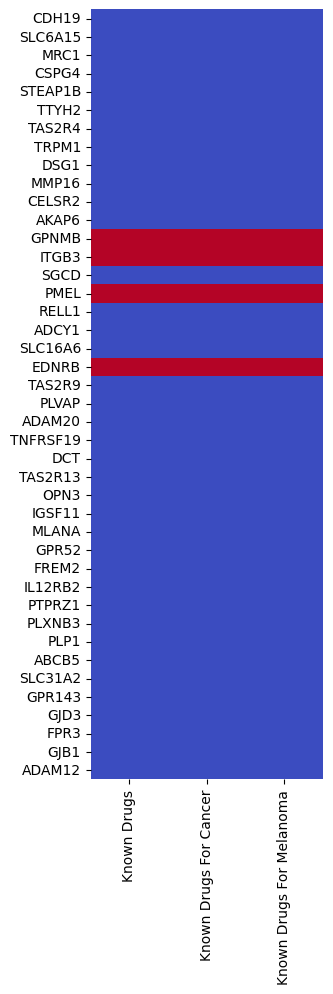

In [31]:
plt.figure(figsize=(3, 10))
sns.heatmap(df[['Known Drugs', 'Known Drugs For Cancer', 'Known Drugs For Melanoma']], cmap='coolwarm', cbar=False, yticklabels=True)